<a href="https://colab.research.google.com/github/Saatvik14/Authentication/blob/master/MaliciousURLfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                    DETECTION OF MALICIOUS URLs

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [ ]:
#libraries for data processing 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#load the data
df=pd.read_csv('/content/drive/MyDrive/finalP/malicious_dataset.csv')
df.head()

,URLs,Class
0,freebase.com/view/en/bob_sirois,good
1,en.wikipedia.org/wiki/Joie_Lee,good
2,pipl.com/directory/people/Rejean/Beaudin,good
3,flickr.com/photos/teneyck/sets/72157610336209297/,good
4,ussoccer.com/News/Federation-Services/2009/06/...,good


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# descriptive statistics summary of the dataset
df.describe()

,URLs,Class
count,420464,420464
unique,411246,2
top,d11m2p9mpffp32.cloudfront.net/main/web_zt.exe,good
freq,27,344821


In [ ]:
df.isnull()  #no null values

,URLs,Class
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
420459,False,False
420460,False,False
420461,False,False
420462,False,False


In [ ]:
df.isnull().sum()

URLs     0
Class    0
dtype: int64

In [ ]:
df.shape

(420464, 2)

In [ ]:
df.columns

Index(['URLs', 'Class'], dtype='object')

In [ ]:
df.nunique() #counts number of unique or distinct elements

URLs     411246
Class         2
dtype: int64

In [ ]:
train_df,test_df=train_test_split(df,test_size=.2,random_state=28)
train_df

,URLs,Class
69059,artsopolis.com/event/detail/52093/The_Shape_of...,good
178914,tourisme-montreal.org/Discover-montreal/Neighb...,good
200882,furnitureantiques.info/sofa-couch-settee/,good
32929,flagapesor.nikblog.com/,good
12986,mylife.com/c-559660208,good
...,...,...
382964,investing.businessweek.com/research/stocks/pri...,good
324886,qosmvyuuwoklly.pl/upload/_dispatch.php,bad
353797,ca.linkedin.com/in/jctremblay,good
200697,dreallen.com/?page_id=4,good


In [ ]:
xtrain=train_df['URLs']
xtest=test_df['URLs']
xtrain.shape

(336371,)

In [ ]:
labels= train_df['Class']
test_labels= test_df['Class']

In [ ]:
print('training samples: ',len(train_df))
print('test samples: ',len(test_df))

training samples:  336371
test samples:  84093


Text(0.5, 1.0, 'Class Count (Training)')

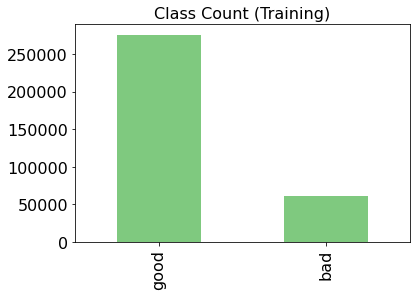

In [ ]:
# bar graph for the count of TRAINING DATA
count_train_classes=pd.value_counts(labels)
count_train_classes.plot(kind='bar',fontsize=16, colormap='Accent')
plt.title('Class Count (Training)',fontsize=16)

Text(0.5, 1.0, 'Class Count (Testing)')

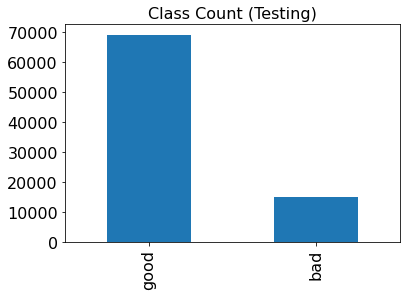

In [ ]:
# bar graph for the count of TESTING DATA
count_test_classes=pd.value_counts(test_labels)  
# value_count returns number of good data, and bad data
count_test_classes.plot(kind='bar',fontsize=16)
plt.title('Class Count (Testing)',fontsize=16)

Interpretation of graphs - The number of good and bad     urls is uniformly divided in testing and training data.

## Create tokenization function

In [ ]:
#TOKENIZATION FUNCTION CALLED TOKENIZER
def tokenizer(url):
    
    tokens=url.split("/")
    global dot_split
    for i in tokens:
        if i.find(".")>=0: # why find(".") before splitting , not directly split as done for ("/")? 
                           # - because it would print the tokens without (".") twice, once as output of .split("/"), 
                           #   other as o/p of .split(".")
            dot_split=i.split(".")

        if "com" in dot_split:
            dot_split.remove("com")  
        if "www" in dot_split:
            dot_split.remove("www")

        tokens+= dot_split

        return tokens

## Vectorize Training Data


In [ ]:
#ON TRAINING DATA---COUNT VECTORIZATION AND TERM FREQUENCY-INVERSE DOCUMENT FREQUENCY(TF-IDF) 

#Training Count Vectorization
cVec=CountVectorizer(tokenizer=tokenizer) # passing custom tokenizer named as tokenizer
                                          # if not used this, the default tokenizer would have removed all punctuations, 
                                          # commas ,all special functions and single characters etc
count_X = cVec.fit_transform(xtrain)

#Training TF-IDF Vectorization
tVec=TfidfVectorizer(tokenizer=tokenizer)
tfidf_X = tVec.fit_transform(xtrain)

In [ ]:
print(type(count_X))
print(type(tfidf_X))

<class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csr.csr_matrix'>


In [ ]:
print(count_X.shape)
print(tfidf_X.shape)

(336371, 534846)
(336371, 534846)


## Vectorize Testing Data

In [ ]:
#ON TESTING DATA---COUNT VECTORIZATION AND TERM FREQUENCY-INVERSE DOCUMENT FREQUENCY(TF-IDF) 

#Testing Count Vectorization
test_count_X = cVec.transform(test_df['URLs'])
#Testing TF-IDF Vectorization
test_tfidf_X = tVec.transform(test_df['URLs'])

NOTES : 
while pre- processing the training and testing data, 
we apply fit_transform on training data - fit calculates mean & variance,
                                          transform func transforms the features using calculated mean and variance.

apply transform on testing data - to use the same mean and variance as it is calculated from our training data
                                  to transform our test data

While implementing the model, use just the fit() method on training data

## EXAMPLE 

### Ex1 : Creating a example url and tokenizing it

In [ ]:
# example of how the url will be tokenized
example_url='www.pipl.study/study/study.com'
print(example_url)

tokenized_url=tokenizer(example_url)  #tokenizes test_url- .com is also removed in this example
print(tokenized_url) 

www.pipl.study/study/study.com
['www.pipl.study', 'study', 'study.com', 'pipl', 'study']


In [ ]:
# TOKEN COUNTS ON TEST URL- just applying manually on the example that we took

#code to get the count of words in each url 
# or the words that repeat in 
dictx = dict.fromkeys(tokenized_url) # fromkeys takes two parameters key ,
                                     # and its value, as here no value given ,
                                     # only key:token given, hence by default it will take NONE as val
print(dictx)
for i in tokenized_url:
    dictx[i]=tokenized_url.count(i)
for i in dictx:
    print("{}-{}".format(dictx[i],i))

{'www.pipl.study': None, 'study': None, 'study.com': None, 'pipl': None}
1-www.pipl.study
2-study
1-study.com
1-pipl


In [ ]:
# COUNT VECTORIZATION AND TF-IDF VECTORIZATION ON TEST URL- just applying manually on the example that we took

#create CountVectorizer and fit_transform on test url
#make sure to apply [] to make the url string a list while taking input from user
#this is because function expects a list and url is a string
print("COUNT")
#count vectorization on test-url
exvec1=CountVectorizer(tokenizer=tokenizer)
exx1=exvec1.fit_transform([example_url])
print(exx1)

print("TF-IDF: ")
#tf-idf vectorization on test-url
exvec2=TfidfVectorizer(tokenizer=tokenizer)
exx2=exvec2.fit_transform([example_url])
print(exx2)


COUNT
  (0, 3)	1
  (0, 1)	2
  (0, 2)	1
  (0, 0)	1
TF-IDF: 
  (0, 0)	0.3779644730092272
  (0, 2)	0.3779644730092272
  (0, 1)	0.7559289460184544
  (0, 3)	0.3779644730092272


### Ex2 - checking how TF-IDF and count Vectorizer increase the columns 

In [ ]:
xtrain=train_df['URLs'].head(3)
xtrain

69059     artsopolis.com/event/detail/52093/The_Shape_of...
178914    tourisme-montreal.org/Discover-montreal/Neighb...
200882            furnitureantiques.info/sofa-couch-settee/
Name: URLs, dtype: object

In [ ]:
ex1=cVec.fit_transform(xtrain)

In [ ]:
print(ex1)
# tokenizes 3 urls into 16 unique tokens. 

  (0, 3)	1
  (0, 6)	1
  (0, 4)	1
  (0, 1)	1
  (0, 13)	1
  (0, 2)	1
  (1, 15)	1
  (1, 5)	1
  (1, 10)	1
  (1, 14)	1
  (1, 11)	1
  (2, 8)	1
  (2, 12)	1
  (2, 0)	1
  (2, 7)	1
  (2, 9)	1


In [ ]:
ex1.shape
# 3 rows : for 3 URLS 
#16 columns : for 16 tokens 

(3, 16)

In [ ]:
ex2=tVec.fit_transform(xtrain)

In [ ]:
print(ex2)

  (0, 2)	0.4082482904638631
  (0, 13)	0.4082482904638631
  (0, 1)	0.4082482904638631
  (0, 4)	0.4082482904638631
  (0, 6)	0.4082482904638631
  (0, 3)	0.4082482904638631
  (1, 11)	0.4472135954999579
  (1, 14)	0.4472135954999579
  (1, 10)	0.4472135954999579
  (1, 5)	0.4472135954999579
  (1, 15)	0.4472135954999579
  (2, 9)	0.4472135954999579
  (2, 7)	0.4472135954999579
  (2, 0)	0.4472135954999579
  (2, 12)	0.4472135954999579
  (2, 8)	0.4472135954999579


In [ ]:
ex2.shape
# same number of rows and columns as count vector 

(3, 16)

# IMPLEMENTING THE MODELS - 

In [ ]:
# importing models and metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report 

### MULTINOMIAL NAIVE BAYES WITH COUNT VECTORIZER

In [ ]:
#MULTINOMIAL NAIVE BAYES WITH COUNT VECTORIZER
#train the model
mnb_count= MultinomialNB()
mnb_count.fit(count_X,labels) 

#test the mode (score,predictions, confusion matrix, classification report)
score_mnb_count =mnb_count.score(test_count_X, test_labels)
predictions_mnb_count=mnb_count.predict(test_count_X)
print("score is: ",score_mnb_count)
print("prediction is: ",predictions_mnb_count)

score is:  0.9759908672541115
prediction is:  ['good' 'good' 'good' ... 'good' 'good' 'good']


In [ ]:
confusion_matrix(test_labels, predictions_mnb_count)

array([[13332,  1674],
       [  345, 68742]])

In [ ]:
print(classification_report(test_labels,predictions_mnb_count))

              precision    recall  f1-score   support

         bad       0.97      0.89      0.93     15006
        good       0.98      1.00      0.99     69087

    accuracy                           0.98     84093
   macro avg       0.98      0.94      0.96     84093
weighted avg       0.98      0.98      0.98     84093



### MULTINOMIAL NAIVE BAYES WITH TF-IDF VECTORIZER

In [ ]:
#MULTINOMIAL NAIVE BAYES WITH TF-IDF VECTORIZER
#train the model
mnb_tfidf= MultinomialNB()
mnb_tfidf.fit(tfidf_X,labels) 

#test the mode (score,predictions, confusion matrix, classification report)
score_mnb_tfidf=mnb_tfidf.score(test_tfidf_X, test_labels)
predictions_mnb_tfidf=mnb_tfidf.predict(test_tfidf_X)
print("score is: ",score_mnb_tfidf)
print("prediction is: ",predictions_mnb_tfidf)

score is:  0.9703780338434828
prediction is:  ['good' 'good' 'good' ... 'good' 'good' 'good']


In [ ]:
confusion_matrix(test_labels, predictions_mnb_tfidf)

array([[12637,  2369],
       [  122, 68965]])

In [ ]:
print(classification_report(test_labels,predictions_mnb_tfidf))

              precision    recall  f1-score   support

         bad       0.99      0.84      0.91     15006
        good       0.97      1.00      0.98     69087

    accuracy                           0.97     84093
   macro avg       0.98      0.92      0.95     84093
weighted avg       0.97      0.97      0.97     84093



### LOGISTC REGRESSION WITH COUNT VECTORIZER

In [ ]:
#LOGISTIC REGRESSION WITH COUNT
#train the model
lgs_count= LogisticRegression()
lgs_count.fit(count_X,labels) 

#test the mode (score,predictions, confusion matrix, classification report)
score_lgs_count =lgs_count.score(test_count_X, test_labels)
predictions_lgs_count=lgs_count.predict(test_count_X)
print("score is: ",score_lgs_count)
print("prediction is: ",predictions_lgs_count)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


score is:  0.967987823005482
prediction is:  ['good' 'good' 'good' ... 'good' 'good' 'good']


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


score is:  0.967987823005482
prediction is:  ['good' 'good' 'good' ... 'good' 'good' 'good']


In [ ]:
confusion_matrix(test_labels, predictions_lgs_count)

array([[12629,  2377],
       [  315, 68772]])

In [ ]:
print(classification_report(test_labels,predictions_lgs_count))

              precision    recall  f1-score   support

         bad       0.98      0.84      0.90     15006
        good       0.97      1.00      0.98     69087

    accuracy                           0.97     84093
   macro avg       0.97      0.92      0.94     84093
weighted avg       0.97      0.97      0.97     84093



### LOGISTC REGRESSION WITH TF-IDF VECTORIZER

In [ ]:
# TRAIN THE MODEL 
lgs_tfidf = LogisticRegression()
lgs_tfidf.fit(tfidf_X, labels)

#test the mode (score,predictions, confusion matrix, classification report)
score_lgs_tfidf=lgs_tfidf.score(test_tfidf_X, test_labels)
predictions_lgs_tfidf=lgs_tfidf.predict(test_tfidf_X)
print("score is: ",score_lgs_tfidf)
print("prediction is: ",predictions_lgs_tfidf)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


score is:  0.9563221671244931
prediction is:  ['good' 'good' 'good' ... 'good' 'good' 'good']


In [ ]:
confusion_matrix(test_labels, predictions_lgs_tfidf)

In [ ]:
print(classification_report(test_labels,predictions_lgs_tfidf))

In [ ]:
#Encoding the text data
labelsEncoded = pd.get_dummies(labels)
labelsEncoded = labelsEncoded.iloc[:,1]
print(labelsEncoded)

In [ ]:
labelsEncoded_test = pd.get_dummies(test_labels)
labelsEncoded_test = labelsEncoded_test.iloc[:,1]
print(labelsEncoded_test)

225499    1
175136    1
73600     1
247657    1
93782     1
         ..
52223     1
142574    1
73538     1
235116    1
110006    1
Name: good, Length: 84093, dtype: uint8


In [ ]:
# TRAIN THE MODEL 
#regressor_count = RandomForestRegressor(n_estimators = 2, random_state = 0)
#regressor_count.fit(count_X,labelsEncoded)

#test the model
#score_regressor_count =regressor_count.score(test_count_X, labelsEncoded_test)
#predictions_regressor_count=regressor_count.predict(test_count_X) 

In [ ]:
#print("score is: ",score_regressor_count) 
#print("prediction is: ",predictions_regressor_count)

In [ ]:
!pip install fuzzywuzzy
from fuzzywuzzy import process

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.8/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
goodlist=df.loc[df['Class']=='good']
print(goodlist)

                                                     URLs Class
0                         freebase.com/view/en/bob_sirois  good
1                          en.wikipedia.org/wiki/Joie_Lee  good
2                pipl.com/directory/people/Rejean/Beaudin  good
3       flickr.com/photos/teneyck/sets/72157610336209297/  good
4       ussoccer.com/News/Federation-Services/2009/06/...  good
...                                                   ...   ...
420458               en.wikipedia.org/wiki/%C3%89quiterre  good
420459  ourorigins.org/genealogielistfirstname.aspx?an...  good
420461  kstatesports.com/sports/w-baskbl/spec-rel/ksu-...  good
420462  vh1.com/video/living-colour/9128/cult-of-perso...  good
420463     absoluteastronomy.com/topics/SummerSlam_(1990)  good

[344821 rows x 2 columns]


In [ ]:
goodlist=goodlist.iloc[:,0]
goodlist.shape

(344821,)

In [ ]:
type(goodlist)

pandas.core.series.Series

In [ ]:
def get_matches(query,choices,limit=1):
  results=process.extract(query,choices,limit=limit)
  return results

In [ ]:
#get_matches("freebase.com/view/en/bob_sirois",goodlist)

In [ ]:
from firebase_admin import ml

In [ ]:
import h5py

def save_coefficients(classifier, filename):
    """Save the coefficients of a linear model into a .h5 file."""
    with h5py.File(filename, 'w') as hf:
        hf.create_dataset("coef",  data=classifier.coef_)
        hf.create_dataset("intercept",  data=classifier.intercept_)
        hf.create_dataset("classes", data=classifier.classes_)

def load_coefficients(classifier, filename):
    """Attach the saved coefficients to a linear model."""
    with h5py.File(filename, 'r') as hf:
        coef = hf['coef'][:]
        intercept = hf['intercept'][:]
        classes = hf['classes'][:]
    classifier.coef_ = coef
    classifier.intercept_ = intercept
    classifier.classes_ = classes


In [ ]:
import tensorflow as tf

model=lgs_count.fit(count_X,labels)
save_coefficients(model, "model.h5")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
lr = LogisticRegression()
load_coefficients(lr, "model.h5")
converter = tf.lite.TFLiteConverter.from_keras_model('/content/model.h5')
#mdl = tf.keras.models.load_model('/content/model.h5')
#converter = tf.lite.TFLiteConverter.from_keras_model(lr)
#Optimisation Constraints 
converter.optimizations = [tf.lite.Optimize.DEFAULT] 
#Conversion and creation
converter.experimental_new_converter = True
tflite_model = converter.convert()
#tflite_model_file = pathlib.Path('tflite_quant_model.tflite')
#tflite_model_file.write_bytes(tflite_quant_model)

AttributeError: ignored